In [161]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy.integrate import quad

precision = 0.1
a = -10
b = 10
interval = np.arange(a,b,precision) 

In [162]:
def lineType(idx):
  if idx == 0:
    return '-r'
  if idx == 1:
    return '-g'
  if idx == 2:
    return '-b'
  if idx == 3:
    return '-k'

def genArr(func):
  return np.vectorize(func)(interval)

def ShowArr(*arr):
  plt.figure(figsize=(20,5))
  axis = np.arange(len(arr[0])) 
  for idx in range(len(arr)):
    plt.plot( axis , arr[idx],lineType(idx))
  plt.grid(True)
  plt.show()

In [163]:
n = 4
wc = 1/precision/2

def Butterworth(w):
  return 1/(1+(w/wc)**(2*n))

def ButterworthArr():
  return np.vectorize(Butterworth)(interval)

def applyButterworthFilter(arr):
  tmp = np.split(arr, 2)
  fs = np.concatenate([tmp[1], tmp[0]])
  fs = fs* ButterworthArr()
  tmp = np.split(fs, 2)
  return np.concatenate([tmp[1], tmp[0]])

In [164]:
def fftMode(arr):
  tmp = np.split(arr, 2)
  return np.concatenate([tmp[1], tmp[0]])


In [208]:
def scaling(arr):
  return arr / np.amax(arr)

In [216]:
def ButterworthFilter(func):
  fft = np.fft.fft(genArr(func))
  fftFilter = applyButterworthFilter(fft)

  ShowArr(scaling(fftMode(fft)), scaling(fftMode(fftFilter)) , scaling(ButterworthArr()))
  
  orig = np.fft.ifft(fft)
  ifftFilter = np.fft.ifft(fftFilter)
  ShowArr(orig , ifftFilter)


In [217]:
def harmonic(a,w1,b,w2):
  def harmonic_(x):
    return (a*np.cos(x*w1) + b*np.sin(x*w2))
  return harmonic_

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


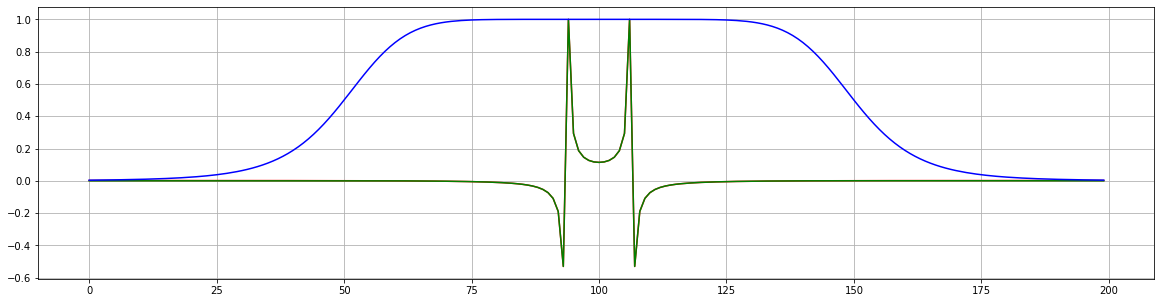

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


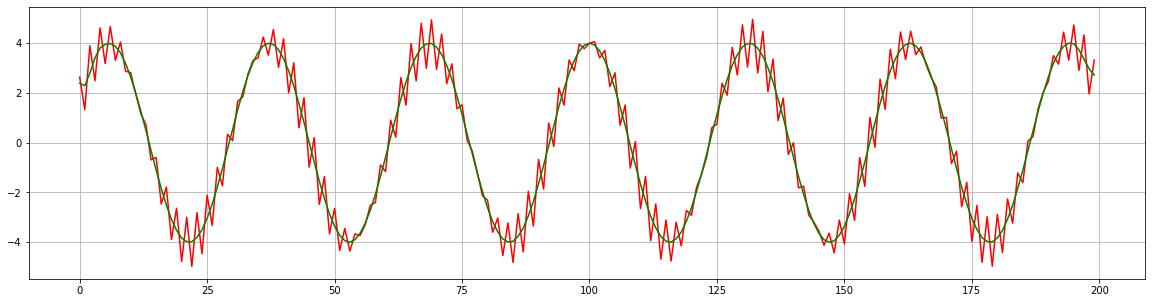

In [218]:
ButterworthFilter(harmonic(4,2,1,30))

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


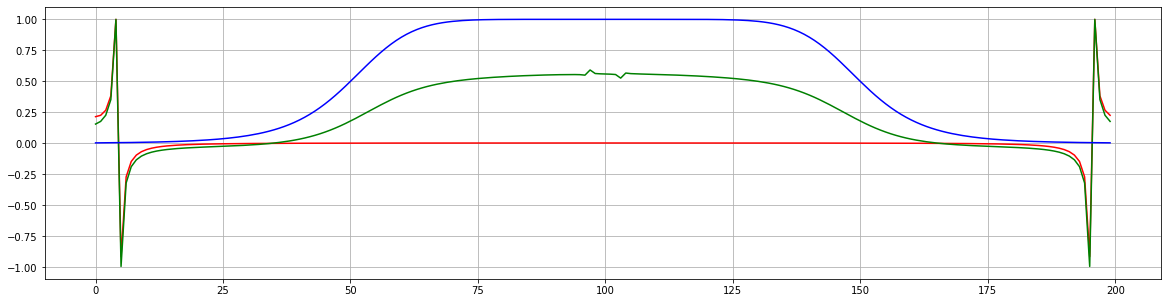

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


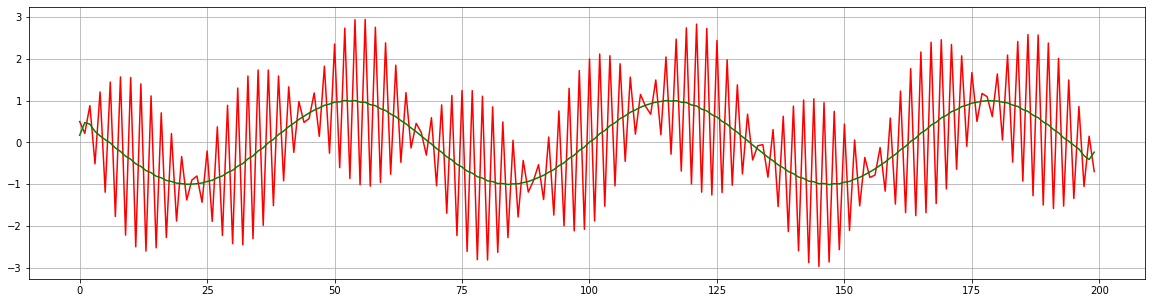

In [219]:
ButterworthFilter(harmonic(2,30,1,1))

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


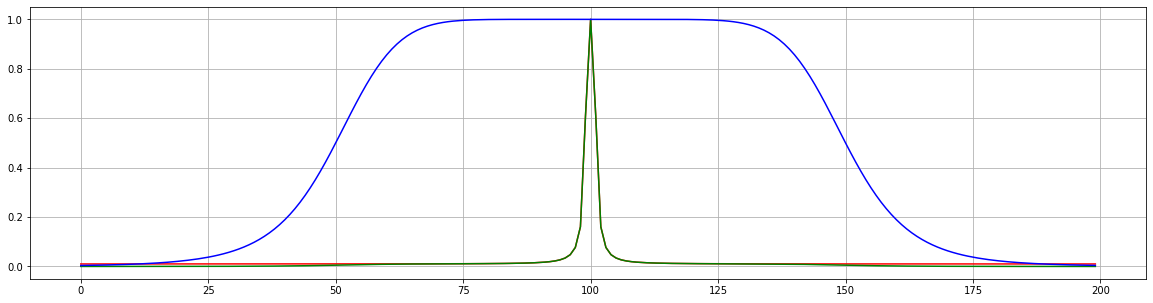

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


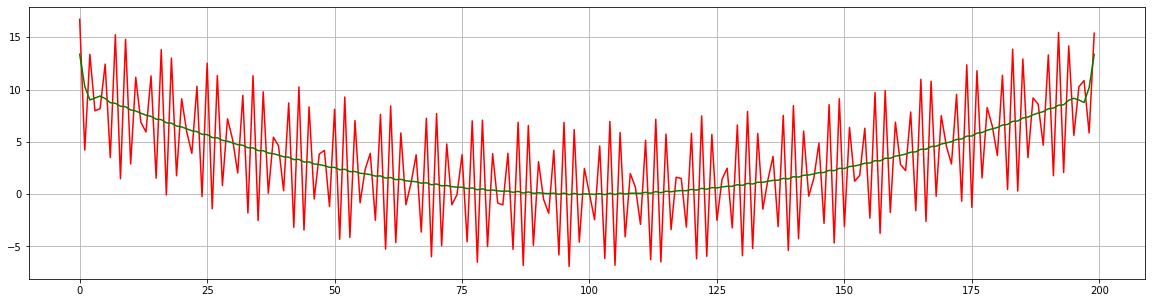

In [230]:

ButterworthFilter(lambda x:0.1 *x**2 + 7*np.sin(35 *x) )